
# 1. Описание разрабатываемого приложения



## Назначение приложения
Приложение для определения и сортировки мусора по фотографии предназначено для анализа изображений отходов и предоставления рекомендаций по правильной их утилизации. Система автоматически определяет тип мусора (пластик, стекло, бумага, органика и т.д.) и подсказывает пользователю, в какой контейнер его нужно выбросить.


## Целевая аудитория
Приложение предназначено для широкого круга пользователей, включая:  
- Частные домохозяйства, желающие сортировать отходы для переработки;  
- Образовательные учреждения, проводящие обучение по экологии;
- Муниципальные службы и компании, занимающиеся сбором и переработкой отходов;
- Любые другие пользователи, кто хочет отсортировать мусор.

## Функции разрабатываемой системы
- Снимать или загружать фотографию мусора для анализа;  
- Автоматически классифицировать тип отходов с помощью технологий искусственного интеллекта;
- Предоставлять рекомендации по правильной сортировке;
- Вести историю анализа мусора и статистику сортировки для пользователя;
- Содержать справочный каталог о типах отходов и способах их утилизации.  


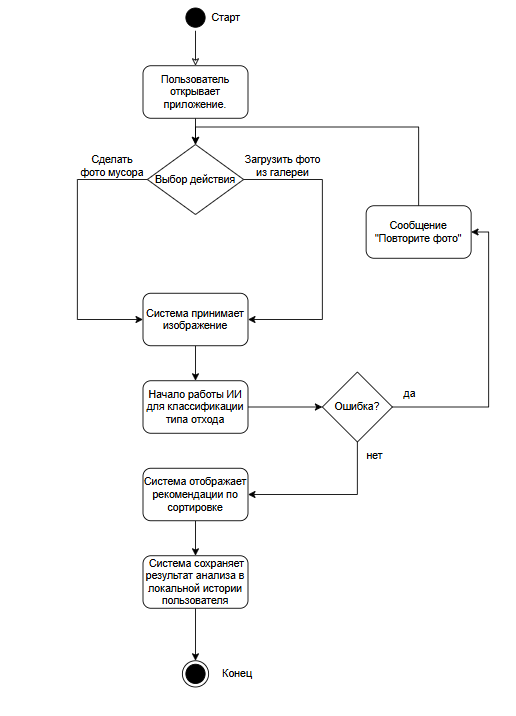

## Нефункциональные требования


* Точность: Система должна обеспечивать корректное определение и классификацию типа отходов с вероятностью ошибок менее 10% при стандартном освещении и качестве фотографии.

* Производительность: Время отклика системы при анализе фотографии мусора не должно превышать 5-7 секунд при одновременной работе до 100 пользователей.

* Масштабируемость: Система должна поддерживать до 10000 сохраненных результатов и до 50 одновременных сессий пользователей без ухудшения времени отклика.

* Безопасность: Доступ к личной истории и настройкам пользователя должен быть защищён через аутентификацию и авторизацию с использованием токенов; данные пользователей должны храниться в зашифрованном виде.

* Удобство использования: Среднее время на один анализ фотографии, начиная от захода в приложение и заканчивая поулчением результата не должно превышать 1 минуты; интерфейс должен быть интуитивно понятен пользователю без необходимости обучения.

* Поддерживаемость: Время внедрения изменений в алгоритм классификации или исправления критических ошибок не должно превышать 24 часа без остановки работы основной системы.

* Портативность: Система должна корректно работать на современных мобильных устройствах (Android 10+ и iOS 14+) с минимальными требованиями: 2 ГБ оперативной памяти и 2-ядерный процессор.

* Доступность: Мобильное приложение должно быть доступно для пользователей с гарантией непрерывной работы не менее 95% времени за месяц, включая работу серверной части для классификации изображений.

# 2. Архитектура разрабатываемого приложения

## 2.1 Выбор технологии искусственного интеллекта

Изображение представляет собой неструктурированный набор пикселей, для которых трудно задать логические признаки вручную. Задача определения мусора по фото относится к категории задач распознавания (классификация).

**Рассматриваемые варианты:**

* Система, основанная на знаниях;

* Нейросетевая система, основанная на многослойном перцептроне (MLP);

* Нейросетевая система, основанная на сверточной нейронной сети (CNN).

Изоражение как неструктурированный набор пикселей едва поддается описанию с помощью правил, характерных для систем, основанных на знаниях;
Модели на основе многослойного перцептрона чувствительны к сдвигам, масштабированию и другим геометрическим искажениям изображения, так как не учитывают пространственные зависимости между пикселями [1];
Модели, основанные на сверточной нейросети в целом демонстрируют лучшие результаты в задачач распознавания, чем многослойные перцептроны [2];
Свёрточные слои используют разделяемые веса (sparse weights) [3], благодаря чему количество параметров и занимаемая память значительно меньше [1], чем у MLP при работе с изображениями большого размера.
Сравнение архитектур MLP и CNN приведены на рисунке [4]:

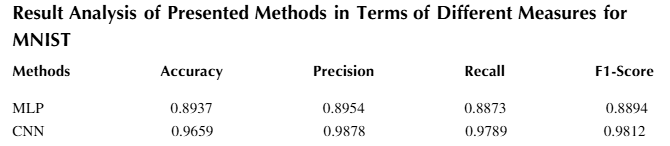

**В качестве решения был выбран CNN**

*****Плюсы:*****
* Более точное распознавание

*****Минусы:*****
* Более сложная реализация

## 2.2 Выбор типа устройства клиента

На данный момент большинство людей в мире предпочитают мобильные устройства больше, чем стационарные компьютеры и с каждым годом это предпочтение только растет [5]. В России на текущий момент также большинство людей используют мобильные устройства в качестве основного устройства [6]. Ниже представлено сравнение долей использований типов устройств в Росии:

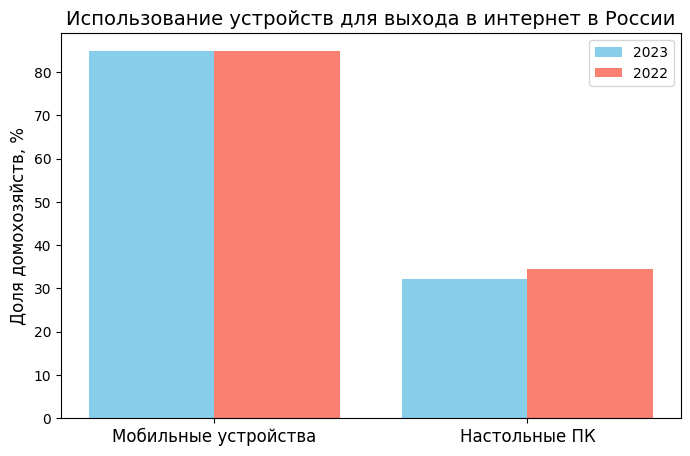

In [ ]:
import matplotlib.pyplot as plt

# Данные
devices = ['Мобильные устройства', 'Настольные ПК']
percentages_2023 = [84.8, 32.1]  # в процентах
percentages_2022 = [84.8 - (84.8-84.8), 34.4]  # если нужно сравнение с 2022, можно подставить

# Настройка позиции столбцов
x = range(len(devices))
width = 0.4

# Строим гистограмму
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x, percentages_2023, width=width, color='skyblue', label='2023')
# Если нужно сравнение с 2022
ax.bar([i + width for i in x], percentages_2022, width=width, color='salmon', label='2022')

# Подписи и оформление
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(devices, fontsize=12)
ax.set_ylabel('Доля домохозяйств, %', fontsize=12)
ax.set_title('Использование устройств для выхода в интернет в России', fontsize=14)
ax.legend()

plt.show()


Поэтому были выбраны следующие расматриваемые варианты:
* Мобильное приложение;
* Web-приложение с адаптивной мобильной версткой.

Согласно статистике пользователи проводят больше времени в мобильном приложении, чем на сайте, адаптированном под мобильные устройства [7]:

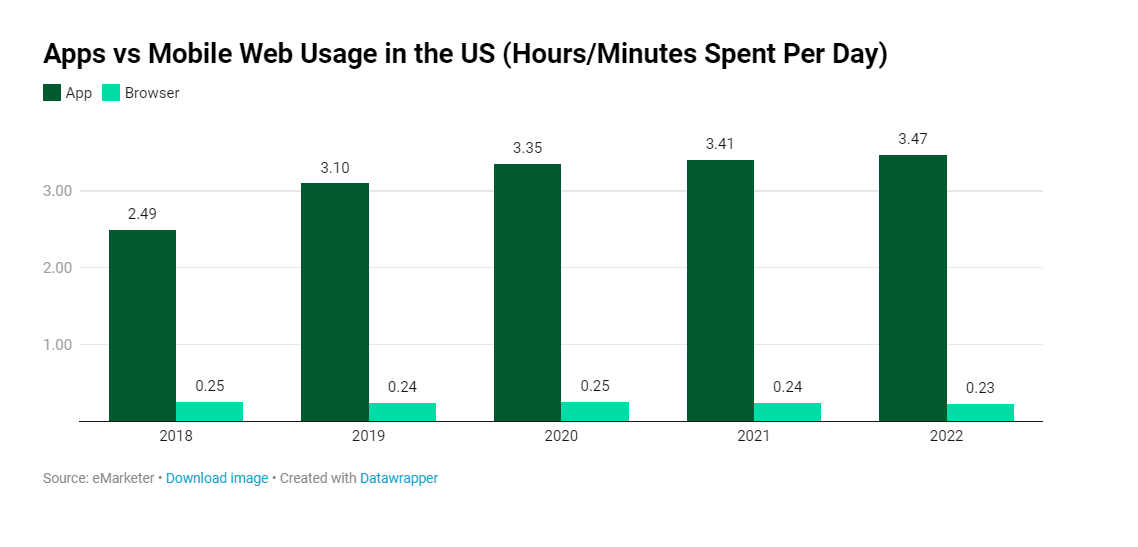

В целом показатели вовлеченности у мобильных приложений выше чем у сайтов [7]. Вот некоторые из них:

* Пользователи просматривают в 4,2 раза больше товаров за сеанс в мобильных приложениях, чем на мобильных сайтах.
* Коэффициент конверсии в приложениях в три раза выше, чем на мобильных сайтах.
* Конверсия в развлекательных приложениях на 233 % выше, чем в мобильном интернете в той же отрасли.
* Конверсия в туристических приложениях на 220 % выше.
* Конверсия в розничных приложениях на 94 % выше.
* Конверсия в приложениях по запросу на 307 % выше.

**В целом у приложений на 157 % выше коэффициент конверсии, чем у мобильных сайтов.**

**В качестве клиента мы выбрали мобильное приложение**

*****Плюсы:*****
* Пользователи проводят больше времени в смартфонах, а именно в мобильных приложениях
* Портативное решение, которое позволит чаще пользоваться продуктом
* Есть опыт разработки мобильных приложений
* Позволяет обеспечить более пользовательски ориентированный дизайн, чем сайт
* Более простой доступ к возможностям устройства

*****Минусы:*****
* Не расчитано на пользователей персональных компьютеров
* Менее унивирсально по сравнению с сайтом
* Необходимость скачивания и установки, занимает место на устройстве

## 2.3 Выбор расположения искуственного интеллекта

Для работы приложения необходимо обеспечить обработку и диагностику изображений дачных растений. Выполнить это можно на самом устройстве или делегировать задачу удаленному серверу, содержание и поддержка которого требует дополнительных усилий и вложений. Предполагается, что использование приложения будет производиться в городах, где есть доступ к мусоркам с возможностью классификации перерабатываемого мусора. Соответсвенно большинство жителей городов имеют доступ в интернет [8].

Ниже представлено сравнение производительности модели нейронной сети в облаке и на устройстве [9]:

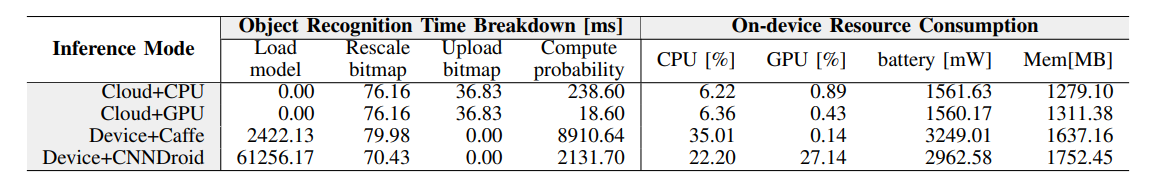

**В качестве решения был выбран облачный подход**

*****Плюсы:*****
* Большая производительность
* Более оптимизированные затраты технических ресурсов
* Более быстрая работа системы

*****Минусы:*****
* Требуется подключение к интернету
* Требуется развернутый сервер

# 3. Выбор технологий разработки

Необходимо выбрать средства для реализации для следующих частей системы:
* Клиентская часть
  * Мобильное приложение
* Серверная часть
  * Язык программирования
  * База данных

## 3.1 Клиентская часть

Были выбрани следующие расматриваемые варианты:

* Нативная разработка
  * Jetpack Compose
  * SwiftUI
* Мультиплатформенная разработка
  * Flutter
  * React Native

Flutter демонстрирует высокую производительность, сопоставимую с нативными решениями (Jetpack Compose, SwiftUI), при этом время запуска приложений и плавность интерфейса остаются на уровне нативных технологий. Кроме того, фреймворк показывает лучшие результаты по стабильности кадров (FPS) и оптимальному использованию памяти, чем React Native, благодаря нативной компиляции в машинный код и использованию движка IMPELLER.


Ниже представлены диаграммы сравнения расматриваемых решений [10]:

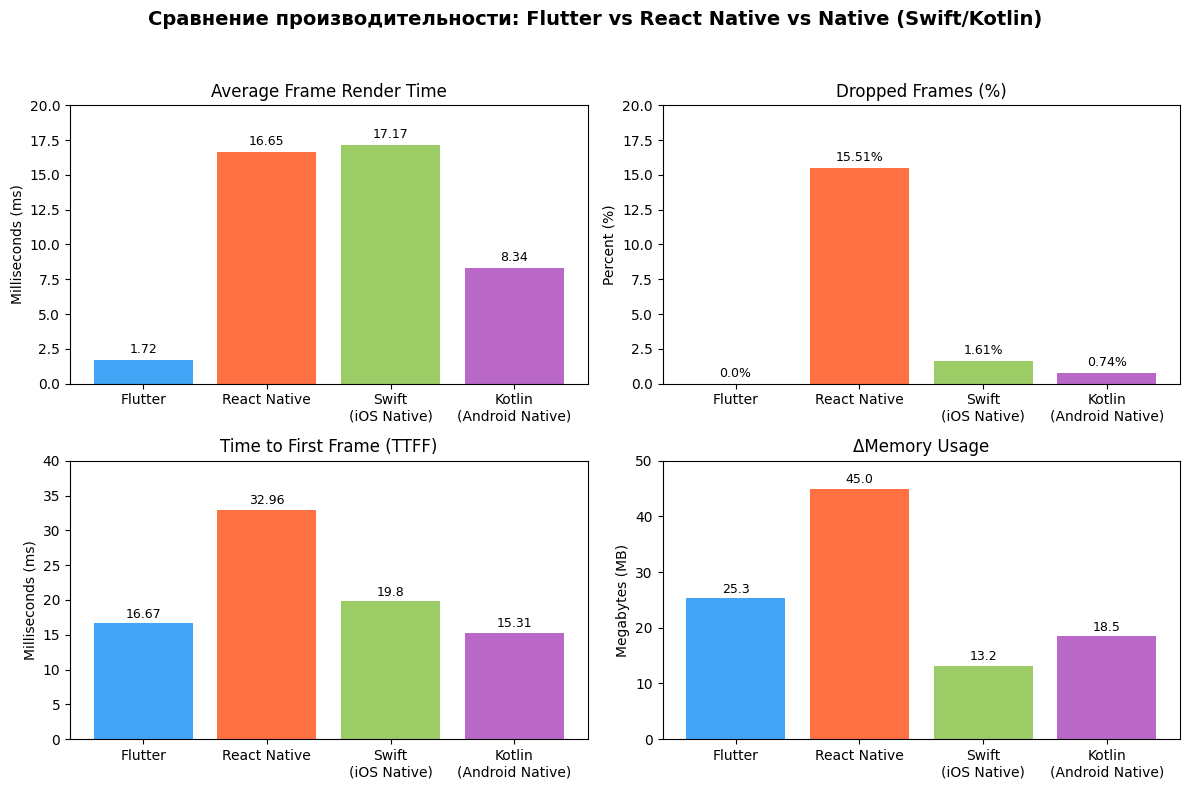

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Названия фреймворков
frameworks = ['Flutter', 'React Native', 'Swift\n(iOS Native)', 'Kotlin\n(Android Native)']

# Среднее время рендеринга кадра (мс)
avg_frame_time = [1.72, 16.65, 17.17, 8.34]

# Процент пропущенных кадров (%)
dropped_frames = [0.0, 15.51, 1.61, 0.74]

# Среднее время до первого кадра (TTFF, мс)
ttff = [16.67, 32.96, 19.80, 15.31]

# Потребление памяти (ΔMemory, МБ)
memory_usage = [25.3, 45.0, 13.2, 18.5]

# Создаём 2x2 сетку графиков
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Сравнение производительности: Flutter vs React Native vs Native (Swift/Kotlin)', fontsize=14, fontweight='bold')

# --- Среднее время рендера ---
axes[0, 0].bar(frameworks, avg_frame_time, color=['#42a5f5', '#ff7043', '#9ccc65', '#ba68c8'])
axes[0, 0].set_title('Average Frame Render Time')
axes[0, 0].set_ylabel('Milliseconds (ms)')
axes[0, 0].set_ylim(0, 20)
for i, val in enumerate(avg_frame_time):
    axes[0, 0].text(i, val + 0.5, f"{val}", ha='center', fontsize=9)

# --- Dropped Frames ---
axes[0, 1].bar(frameworks, dropped_frames, color=['#42a5f5', '#ff7043', '#9ccc65', '#ba68c8'])
axes[0, 1].set_title('Dropped Frames (%)')
axes[0, 1].set_ylabel('Percent (%)')
axes[0, 1].set_ylim(0, 20)
for i, val in enumerate(dropped_frames):
    axes[0, 1].text(i, val + 0.5, f"{val}%", ha='center', fontsize=9)

# --- Time to First Frame ---
axes[1, 0].bar(frameworks, ttff, color=['#42a5f5', '#ff7043', '#9ccc65', '#ba68c8'])
axes[1, 0].set_title('Time to First Frame (TTFF)')
axes[1, 0].set_ylabel('Milliseconds (ms)')
axes[1, 0].set_ylim(0, 40)
for i, val in enumerate(ttff):
    axes[1, 0].text(i, val + 0.8, f"{val}", ha='center', fontsize=9)

# --- Memory Usage ---
axes[1, 1].bar(frameworks, memory_usage, color=['#42a5f5', '#ff7043', '#9ccc65', '#ba68c8'])
axes[1, 1].set_title('ΔMemory Usage')
axes[1, 1].set_ylabel('Megabytes (MB)')
axes[1, 1].set_ylim(0, 50)
for i, val in enumerate(memory_usage):
    axes[1, 1].text(i, val + 1, f"{val}", ha='center', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**В качестве решения был выбран Flutter**





*****Плюсы:*****
* Кроссплатформенность
* Есть опыт разработки на Flutter
* Почти не уступает в производительности нативным решениям

*****Минусы:*****
* В некоторых случаях может быть менее производительнее, чем нативные решения

## 3.2 Серверная часть

Серверная часть включает язык программирования, на котором будет развернут сервер, а также будет работать нейронная сеть и базу данных для хранения.

### 3.2.1 Выбор языка программирования

К рассмотрению были выбраны следующие языки программирования:
* Java
* Python
* R
* Julia





Ниже приведено сравнение этих языков в контексте нейронных сетей [11]:

/tmp/ipython-input-3767180716.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Язык", y="Время выполнения (сек)", data=df_perf, palette="pastel", ax=axes[0])
/tmp/ipython-input-3767180716.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Язык", y="LOC (строки кода)", data=df_perf, palette="muted", ax=axes[1])


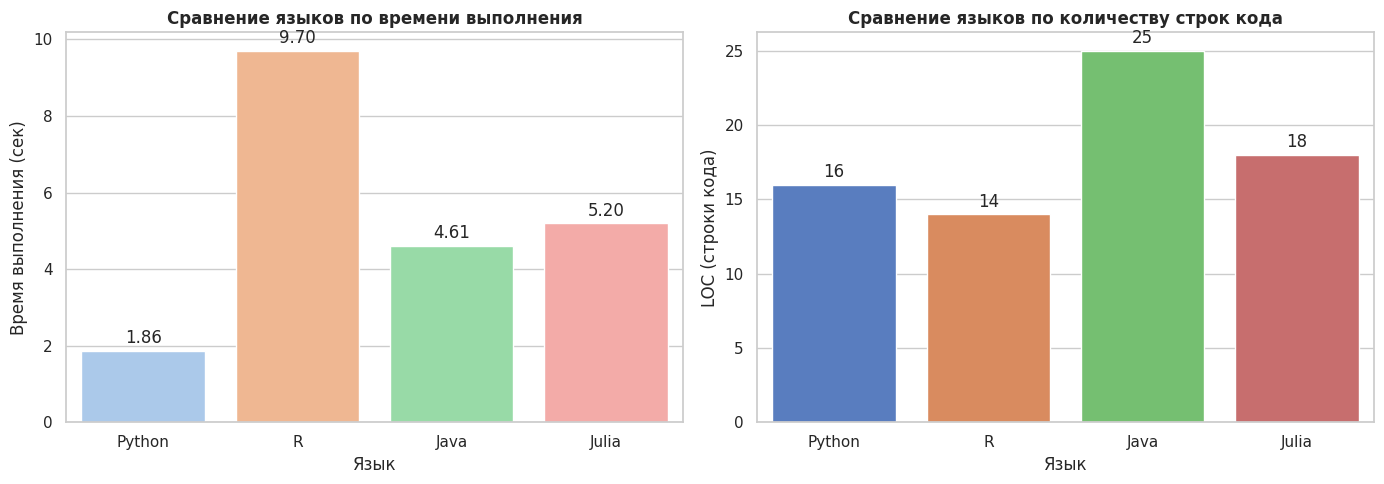

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Данные
performance_data = {
    "Язык": ["Python", "R", "Java", "Julia"],
    "Время выполнения (сек)": [1.86, 9.70, 4.61, 5.20],
    "LOC (строки кода)": [16, 14, 25, 18]
}

df_perf = pd.DataFrame(performance_data)

# Настройка стиля
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма: Время выполнения
sns.barplot(x="Язык", y="Время выполнения (сек)", data=df_perf, palette="pastel", ax=axes[0])
axes[0].set_title("Сравнение языков по времени выполнения", fontsize=12, fontweight='bold')
for i, v in enumerate(df_perf["Время выполнения (сек)"]):
    axes[0].text(i, v + 0.2, f"{v:.2f}", ha='center')

# Гистограмма: LOC
sns.barplot(x="Язык", y="LOC (строки кода)", data=df_perf, palette="muted", ax=axes[1])
axes[1].set_title("Сравнение языков по количеству строк кода", fontsize=12, fontweight='bold')
for i, v in enumerate(df_perf["LOC (строки кода)"]):
    axes[1].text(i, v + 0.5, str(v), ha='center')

plt.tight_layout()
plt.show()


Python демонстрирует оптимальный баланс между читаемостью, богатством библиотек и скоростью разработки, что делает его наиболее универсальным и популярным языком для ИИ и быстрого прототипирования. R остаётся сильным инструментом для статистического анализа и визуализации данных, но уступает в производительности и гибкости для сложных ИИ-задач. Java выигрывает в скорости выполнения и масштабируемости, что делает его предпочтительным для корпоративных и ресурсозависимых решений, хотя требует больше строк кода и более строгого синтаксиса. Julia сочетает чистый синтаксис и высокую производительность, особенно на численных и параллельных вычислениях, но её экосистема и поддержка онлайн-платформ пока уступают Python [11].

**В качестве решения был выбран Python**





*****Плюсы:*****
* Простая и читаемая синтаксическая структура, похожая на псевдокод;

* Широкая экосистема библиотек для машинного обучения, ИИ и анализа данных (TensorFlow, PyTorch, scikit-learn, Pandas, NumPy);

* Отлично подходит для быстрого прототипирования и экспериментов;

* Хорошая интеграция с внешними платформами, включая облачные сервисы.

*****Минусы:*****
* Интерпретируемый язык, что может ограничивать производительность при высоких вычислительных нагрузках;

* Ограниченная масштабируемость при работе с очень большими данными из-за GIL;

* Иногда высокая нагрузка на память при больших матрицах и сложных вычислениях.

### 3.2.2 Выбор базы данных

Для выбора базы данных, возьмем к рассмотрению несколько самых популярных баз данных:

* PstgreSQL;
* MySQL;
* SQLite;
* Microsoft SQL;
* MongoDB;
* Redis.


Ниже приведено сравнение этих баз данных по скорости выполнения запросов [12]:

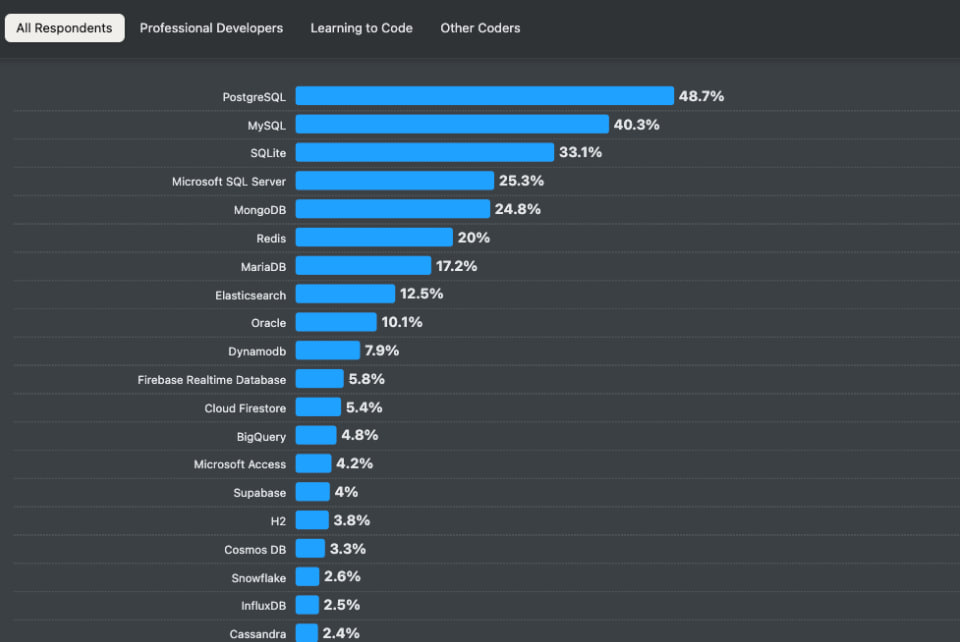


PostgreSQL является гибким инструментом для разработки разнообразных приложений — от аналитики и веб-сервисов до распределённых систем. Использование PostgreSQL в рамках YugabyteDB позволяет объединять устойчивость и масштабируемость корпоративного уровня с совместимостью существующих приложений и библиотек, что делает PostgreSQL универсальным выбором.

**В качестве решения был выбран PostgreSQL**

*****Плюсы:*****
* Надёжность и устойчивость — проверенная временем СУБД, подходит для критически важных приложений.

* Расширяемость и богатый функционал — поддержка плагинов, пользовательских функций, JSON, полнотекстового поиска и геоданных (PostGIS).

* Стандарты SQL и совместимость — соблюдает SQL-стандарты, легко интегрируется с существующими приложениями.

* Поддержка распределённых и облачных решений — совместимость с YugabyteDB и другими кластерными системами.

* Активное сообщество и обширная документация — быстрый доступ к знаниям, примерам и инструментам.

* Гибкость использования — подходит как для аналитики и BI, так и для веб-приложений, API и распределённых систем.

*****Минусы:*****
* Сложность настройки для крупных и высоконагруженных систем — может потребоваться опытный DBA для оптимизации производительности.

* Меньше встроенных инструментов для горизонтального масштабирования по сравнению с некоторыми NoSQL-системами, хотя YugabyteDB решает эту проблему.

* Ресурсоёмкость при сложных запросах — большие аналитические или агрегационные операции могут требовать значительных вычислительных ресурсов.


# Список использованных источников

1. Aston Z., Zhang A., Lipton Z. C., Smola A. J. Dive into learning. 1-е изд. - Cambridge: Cambridge University Press, 2023. - 574 с. - ISBN 1009389432. - URL: https://d2l.ai/
2. Maryna Dovbnych, Małgorzata Plechawska–Wójcik, A comparison of conventional and deep learning methods of image classification // Journal of Computer Sciences Institute №21, 2021. P. 303-308. - DOI: 10.35784/jcsi.2727
3. Goodfellow I., Bengio Y., Courville A. Deep learning. - Cambridge, MA: MIT Press, 2016. - 775 с. - ISBN 0262035618. - URL: https://www.deeplearningbook.org/
4. Balamurugan S.P. A Comprehensive Study on MLP and CNN, and the Implementation of Multi-Class Image Classification using Deep CNN [Электронный ресурс] / S.P. Balamurugan. – 2022. – Режим доступа: https://www.researchgate.net/publication/359249648_A_Comprehensive_Study_on_MLP_and_CNN_and_the_Implementation_of_Multi-Class_Image_Classification_using_Deep_CNN  (дата обращения: 09.11.2025).
5. The Global Statistics. Device Usage Trends 2023–2025 [Электронный ресурс]. – Режим доступа: https://www.theglobalstatistics.com/device-usage-trends/
 (дата обращения: 09.11.2025).
6. Институт статистических исследований и экономики знаний НИУ ВШЭ. Интернет в России: смартфон — главное устройство для выхода в сеть [Электронный ресурс]. — Режим доступа: https://issek.hse.ru/news/923864431.html
 (дата обращения: 06.11.2025).
7. MobiLoud. Mobile Apps vs Mobile Websites: Which Is Better for Your Business in 2025? [Электронный ресурс]. – Режим доступа: https://www.mobiloud.com/blog/mobile-apps-vs-mobile-websites
 (дата обращения: 09.11.2025).
8. Приволжье. Через сотовую связь в 2024 году выходили в интернет 79% нижегородских семей [Электронный ресурс]. – Режим доступа: https://www.kommersant.ru/doc/7907605  (дата обращения: 09.11.2025).
9. Guo T. Cloud-based or On-device: An Empirical Study of Mobile Deep Inference [Электронный ресурс] / Tian Guo. – Worcester, MA, USA: Worcester Polytechnic Institute, Computer Science Department, 2017. – Режим доступа: https://arxiv.org/abs/1707.04610  (дата обращения: 09.11.2025).
10. SynergyBoat. Flutter vs React Native vs Native Performance Benchmark 2025 [Электронный ресурс]. — Режим доступа: https://www.synergyboat.com/blog/flutter-vs-react-native-vs-native-performance-benchmark-2025 (дата обращения: 09.11.2025).
11. Туркмен Г., Сезен А., Шенгюл Г. Comparative Analysis of Programming Languages Utilized in Artificial Intelligence Applications: Features, Performance, and Suitability // International Journal of Computational and Experimental Science and Engineering. — 2024. — Vol. 10, No. 3. — P. 461–469. — DOI: 10.22399/ijcesen.342. — License CC BY 4.0. — Режим доступа: https://www.researchgate.net/publication/383696742_Comparative_Analysis_of_Programming_Languages_Utilized_in_Artificial_Intelligence_Applications_Features_Performance_and_Suitability . — Дата обращения: 09.11.2025.
12. Why PostgreSQL Remains the Top Choice for Developers in 2025 | Yugabyte
[Электронный ресурс]. – Режим доступа: https://www.yugabyte.com/blog/postgresql-top-choice-in-2025/ . – Дата доступа: 18.10.2025.